In [83]:
import os
import settings
import pandas as pd
import numpy as np
import operator
import graphviz
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor

def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

def sort_important_features(df):
    dt = DecisionTreeRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = dt.fit(df[predictors], df[settings.TARGET])
    predictions = dt.predict(df[predictors])
    results = {name: score for name, score in zip(predictors, dt.feature_importances_)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = dt.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    return model

In [86]:
df = read_data()

In [87]:
model = sort_important_features(df)

feature: Sixltr, importance: 0.24396661325188207
feature: anger_3q, importance: 0.04694425487488707
feature: body, importance: 0.04657816519265995
feature: number, importance: 0.04576270153339448
feature: focuspast, importance: 0.03337376453161465
feature: Ingroup, importance: 0.03287933974734934
feature: assent, importance: 0.03196947373394932
feature: focusfuture, importance: 0.025518059923769834
feature: conj, importance: 0.023128389597055377
feature: focuspresent, importance: 0.021981985736929614
feature: relig, importance: 0.0215947857387206
feature: hear, importance: 0.017262842477915846
feature: MoralityGeneral, importance: 0.016121207307931592
feature: HarmVirtue, importance: 0.01610836053523039
feature: negate, importance: 0.01502068306871043
feature: posemo, importance: 0.014966390411280688
feature: negemo_change_h, importance: 0.014528278042759265
feature: posemo_4q, importance: 0.012392062741285004
feature: bio, importance: 0.011878936424230577
feature: differ, importance: 

In [88]:
def print_tree(model):
    predictors = df.columns.tolist()
    features = [p for p in predictors if p not in settings.NON_PREDICTORS]
    data = export_graphviz(model, out_file=None, feature_names=features)
    graph = graphviz.Source(data)
    graph.render(view=True)

In [ ]:
print_tree(model)

## Random Forest 

In [89]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def sort_important_features(df):
    rf = RandomForestRegressor()
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    model = rf.fit(df[predictors], df[settings.TARGET])
    predictions = rf.predict(df[predictors])
    importances = rf.feature_importances_
    
    results = {name: score for name, score in zip(predictors, importances)}
    sorted_results = sorted(results.items(), key=operator.itemgetter(1), reverse=True)
    for feat, importance in sorted_results:
        print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
    accuracy = rf.score(df[predictors], df[settings.TARGET])
    print("Accuracy: {}".format(accuracy))
    names = [k[0] for k in sorted_results]
    return model, importances, names

def plot_feature_importances(df, importances, names):
    reversed_names = names[::-1]
    predictors = df.columns.tolist()
    predictors = [p for p in predictors if p not in settings.NON_PREDICTORS]
    features = predictors
    indices = np.argsort(importances)
    predictors = np.array(predictors)
    
    
    plt.figure(figsize=(30,30))
    matplotlib.rcParams.update({'font.size': 16})
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')

    plt.yticks(range(len(indices)),reversed_names)
    plt.xlabel('Relative Importance')
    plt.show()

In [90]:
rf, importances, names = sort_important_features(df)

feature: leisure, importance: 0.08172158685928392
feature: relig, importance: 0.058268152446274056
feature: posemo_1h, importance: 0.042054185154843285
feature: auxverb, importance: 0.034522078722509224
feature: focusfuture, importance: 0.031850007003579116
feature: hear, importance: 0.027432035390216204
feature: negate, importance: 0.025843634810630824
feature: body, importance: 0.022480972293126254
feature: adverb, importance: 0.020039056314468957
feature: focuspast, importance: 0.01887601835490288
feature: number, importance: 0.017914152449249605
feature: Harm, importance: 0.017901325404268417
feature: negemo, importance: 0.017004656966862795
feature: social, importance: 0.015101730902135882
feature: MoralityGeneral, importance: 0.014826051280938774
feature: anger_2q, importance: 0.014020392077568397
feature: bio, importance: 0.013013737492461768
feature: power, importance: 0.012142540804835383
feature: anger_4q, importance: 0.012061993046586592
feature: sexual, importance: 0.011712

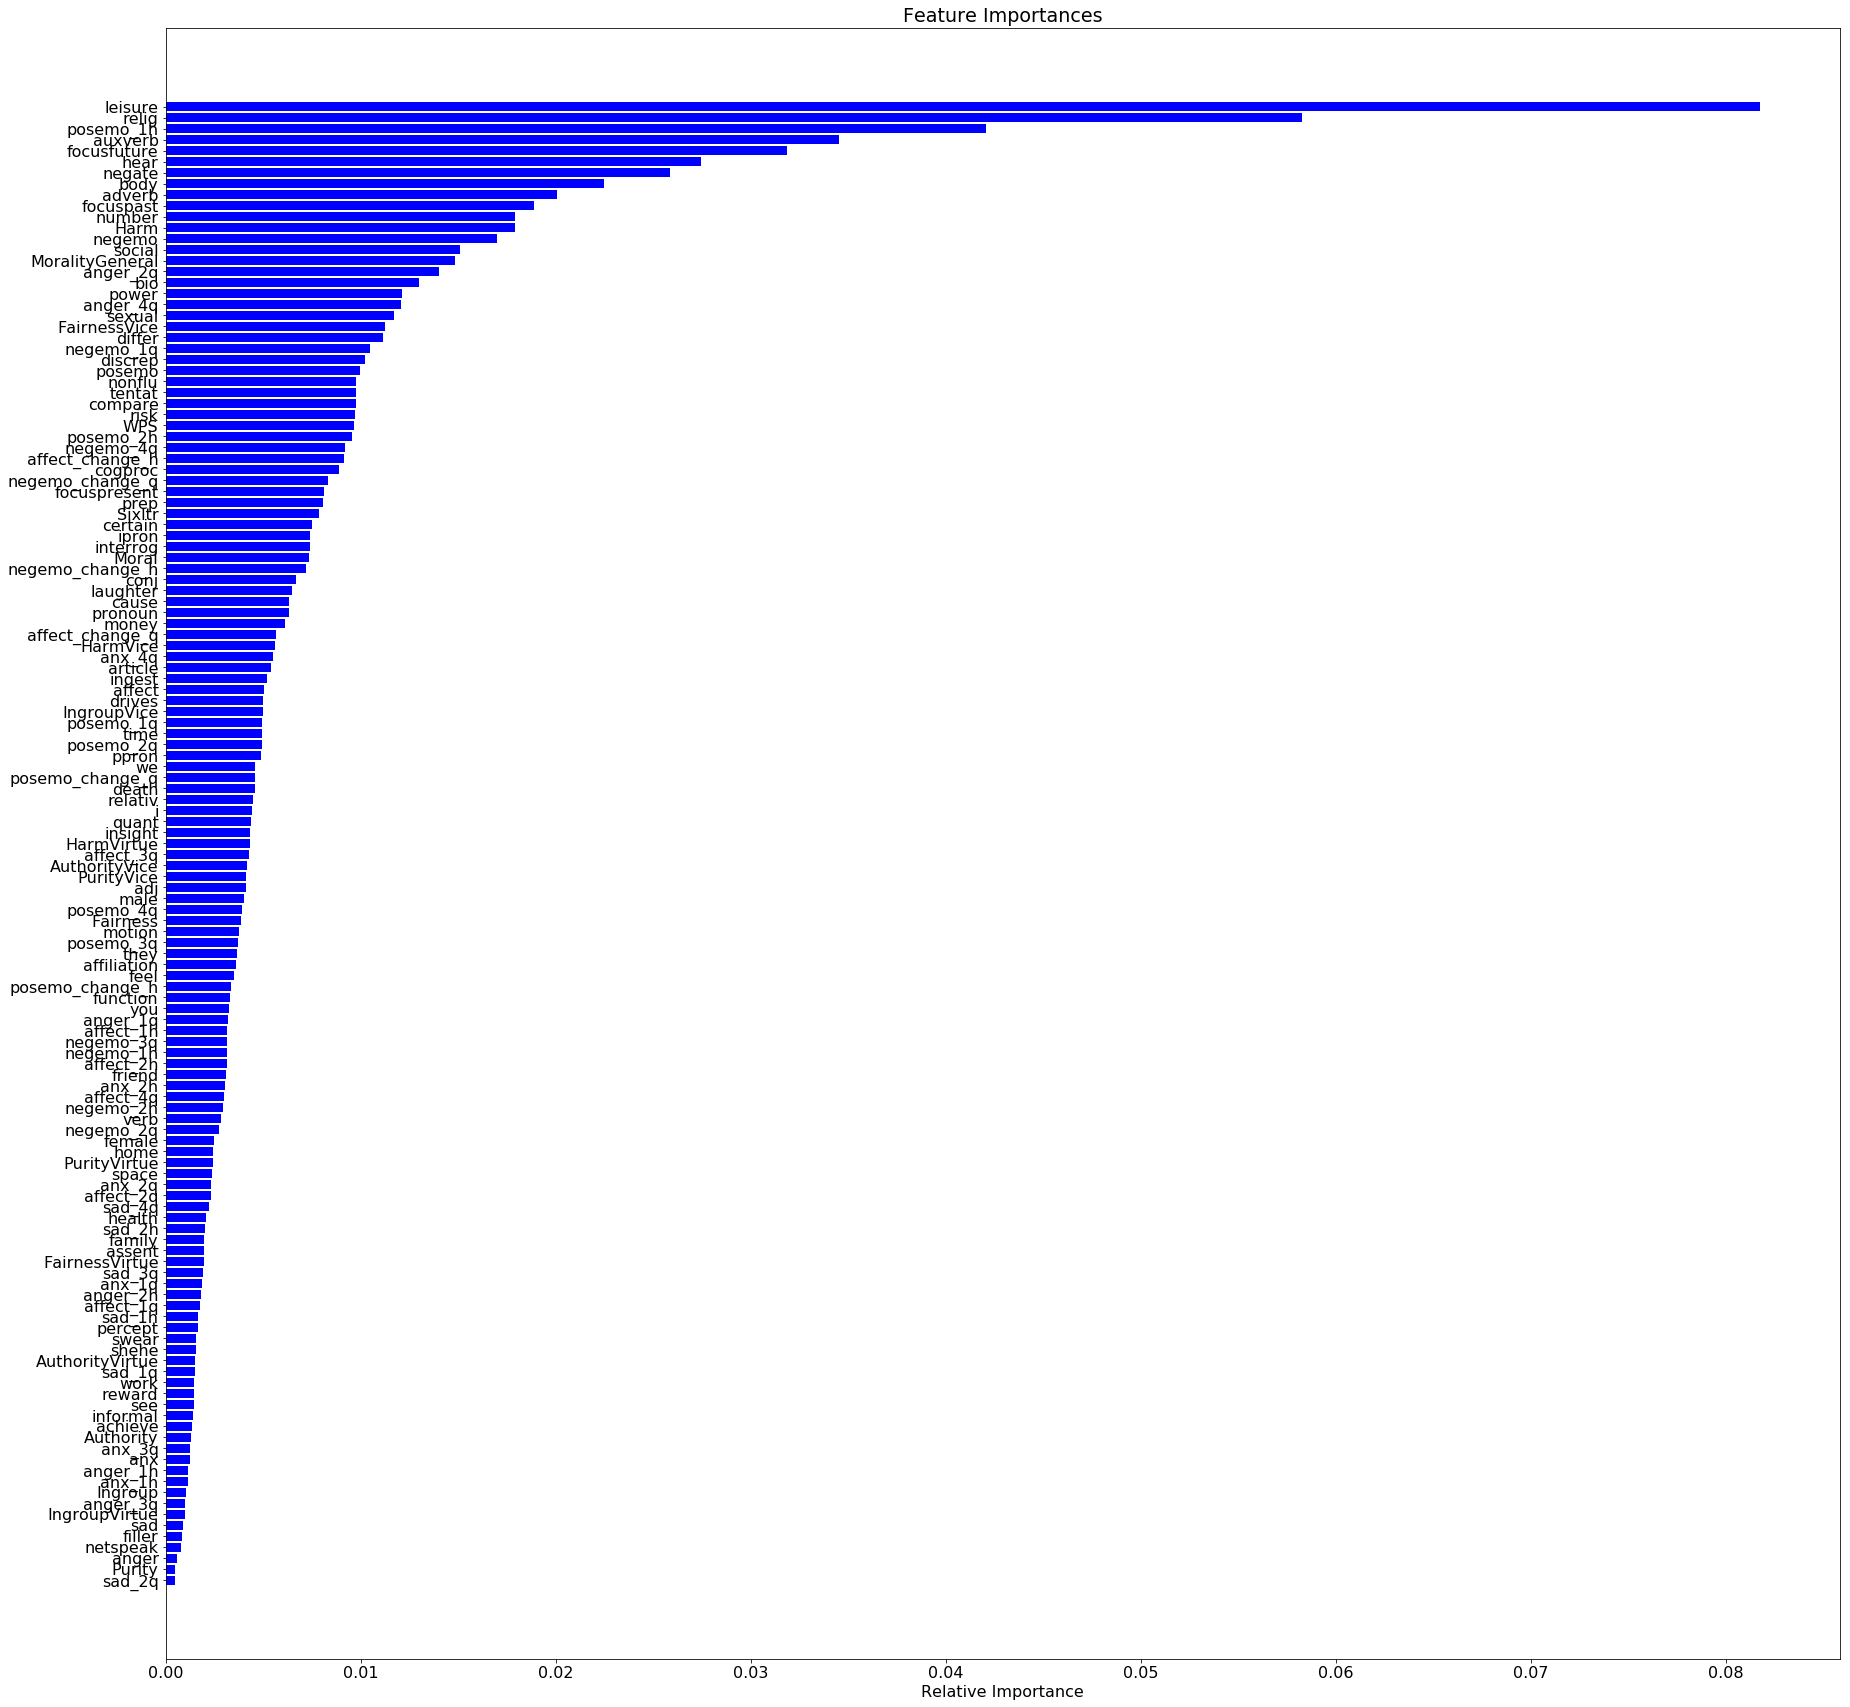

In [91]:
plot_feature_importances(df, importances, names)

## Linear Regression

In [92]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [107]:
def create_summary(df):
    lr = LinearRegression()
    predictors = df.columns.tolist()
    predictors = ['relig', 'MoralityGeneral', 'cogproc', 'focuspast', 'focuspresent']
    lr.fit(df[predictors], df['norm_unconvincing'])

    X = df[predictors]
    X2 = sm.add_constant(X)
    est = sm.OLS(df['norm_unconvincing'], X2)
    est2 = est.fit()
    print(est2.summary())

In [108]:
create_summary(df)

                            OLS Regression Results                            
Dep. Variable:      norm_unconvincing   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     26.93
Date:                Fri, 12 Jan 2018   Prob (F-statistic):           1.39e-26
Time:                        18:10:32   Log-Likelihood:                -13920.
No. Observations:                2406   AIC:                         2.785e+04
Df Residuals:                    2400   BIC:                         2.789e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8557     12.948     